In [1]:
import random
import matplotlib 
matplotlib.use('Agg') 
% matplotlib inline
import matplotlib.pyplot as plt

In [2]:
## looking at the data

In [3]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.preprocessing.image import array_to_img


# input image dimensions
img_rows, img_cols = 32, 32

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
input_shape = (img_rows, img_cols, 3)

list_concepts = ['airplane', 
                 'automobile', 
                 'bird', 
                 'cat', 
                 'deer', 
                 'dog', 
                 'frog', 
                 'horse', 
                 'ship', 
                 'truck']

nb_classes = len(list_concepts)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Using TensorFlow backend.


X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


47527
[8] ship


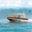

In [4]:
i = random.randint(0, len(y_train))
print(i,) 
print(y_train[i], list_concepts[y_train[i][0]])
array_to_img(X_train[i])

In [5]:
## train the network

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

In [7]:
from keras.callbacks import History, ModelCheckpoint

class PlotHistory(History):
    def __init__(self, file_name='history.png'):
        History.__init__(self)
        self.file_name = file_name
    def on_epoch_end(self, epoch, logs={}):
        History.on_epoch_end(self, epoch, logs)
        self.plot_logs()
    def plot_logs(self):
        evaluation_cost = self.history['val_loss']
        evaluation_accuracy = self.history['val_acc']
        training_cost = self.history['loss']
        training_accuracy = self.history['acc']
        f, (ax1, ax2) = plt.subplots(1, 2)
        f.set_figwidth(10)
        ax1.plot(evaluation_cost,label= 'test')
        ax1.plot(training_cost, label='train')
        ax1.set_title('Cost')
        ax1.legend()
        ax2.plot(evaluation_accuracy, label='test')
        ax2.plot(training_accuracy, label='train')
        ax2.set_title('Accuracy')
        ax2.legend(loc='lower right')
        f.savefig(self.file_name)
        plt.close(f)

In [8]:
## magic numbers:
batch_size = 128
nb_epoch = 40

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

model = Sequential()
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))

model.add(MaxPooling2D(pool_size=pool_size))

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

plot_history_callback = PlotHistory('cifar10.png')
save_snapshots = ModelCheckpoint('cifar10.h5')

history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test), 
                    callbacks=[plot_history_callback, save_snapshots])
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="valid")`
  from ipykernel import kernelapp as app
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/40
3s - loss: 2.0370 - acc: 0.2625 - val_loss: 1.8833 - val_acc: 0.3434
Epoch 2/40
2s - loss: 1.8015 - acc: 0.3673 - val_loss: 1.7816 - val_acc: 0.3785
Epoch 3/40
2s - loss: 1.7155 - acc: 0.4030 - val_loss: 1.7559 - val_acc: 0.3768
Epoch 4/40
2s - loss: 1.6597 - acc: 0.4261 - val_loss: 1.6392 - val_acc: 0.4247
Epoch 5/40
2s - loss: 1.6051 - acc: 0.4434 - val_loss: 1.5939 - val_acc: 0.4455
Epoch 6/40
2s - loss: 1.5573 - acc: 0.4609 - val_loss: 1.5199 - val_acc: 0.4774
Epoch 7/40
2s - loss: 1.5187 - acc: 0.4748 - val_loss: 1.5054 - val_acc: 0.4648
Epoch 8/40
2s - loss: 1.4833 - acc: 0.4878 - val_loss: 1.5974 - val_acc: 0.4393
Epoch 9/40
2s - loss: 1.4576 - acc: 0.4974 - val_loss: 1.4594 - val_acc: 0.4916
Epoch 10/40
2s - loss: 1.4314 - acc: 0.5055 - val_loss: 1.4188 - val_acc: 0.5108
Epoch 11/40
2s - loss: 1.4093 - acc: 0.5145 - val_loss: 1.4631 - val_acc: 0.4936
Epoch 12/40
2s - loss: 1.3881 - acc: 0.5209 - val_loss: 1.4231 - val

In [9]:
## looking at our model

In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from PIL import Image
import requests
import io
import numpy
def load_photo_from_url(image_url, target_size=None, time_out_image_downloading=1):
    response = requests.get(image_url, timeout=time_out_image_downloading)
    image = Image.open(io.BytesIO(response.content))
    image = image.resize((target_size[1], target_size[0]))
    img_array = img_to_array(image) / 255.0
    img_array = img_array.reshape((1,) + img_array.shape)
    return img_array

In [11]:
url = 'https://cdn.eyeem.com/thumb/898895b99f70bff29986de9133516b6a781f5cd0-1437676159/w/450'
predictions = model.predict(load_photo_from_url(url,(32,32)))
list_concepts[numpy.argmax(predictions)]

'ship'

In [12]:
from keras.optimizers import Adam

## magic numbers:
batch_size = 128
nb_epoch = 50

# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

model_ = Sequential()                                                          
                                                                               
model_.add(Convolution2D(64, kernel_size[0], kernel_size[1],           
                            border_mode='valid',                               
                            input_shape=input_shape))    
model_.add(Activation('relu')) 
model_.add(Convolution2D(64, kernel_size[0], kernel_size[1],border_mode='same'))          
model_.add(Activation('relu'))                       
model_.add(MaxPooling2D(pool_size=pool_size))     
model_.add(Dropout(0.3))

  
model_.add(Convolution2D(128, kernel_size[0], kernel_size[1],border_mode='same'))          
model_.add(Activation('relu'))                       
model_.add(MaxPooling2D(pool_size=pool_size))                                  
model_.add(Dropout(0.4))  

model_.add(Convolution2D(256, kernel_size[0], kernel_size[1],border_mode='same'))          
model_.add(Activation('relu')) 
model_.add(MaxPooling2D(pool_size=pool_size))                                  
model_.add(Dropout(0.4)) 

model_.add(Convolution2D(512, kernel_size[0], kernel_size[1],border_mode='same'))          
model_.add(Activation('relu')) 
model_.add(MaxPooling2D(pool_size=pool_size))                                  
model_.add(Dropout(0.4))

model_.add(Flatten())                                                            
model_.add(Dense(512))                                                         
model_.add(Activation('relu'))   
model_.add(Dropout(0.5))

model_.add(Dense(256))                                                         
model_.add(Activation('relu'))    
                                                                                                          
model_.add(Dense(nb_classes))                                                  
model_.add(Activation('softmax'))                                              
                                                                               
model_.compile(loss='categorical_crossentropy',                                
                      optimizer='Nadam',                                   
                      metrics=['accuracy'])  

plot_history_callback = PlotHistory('cifar10.png')
save_snapshots = ModelCheckpoint('cifar10.h5')

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(datagen.flow(X_train, Y_train,
                                 batch_size=batch_size),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=nb_epoch,
validation_data=(X_test, Y_test), verbose=2)


score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="valid")`
  app.launch_new_instance()
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same

Using real-time data augmentation.
Epoch 1/50


/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., verbose=2, steps_per_epoch=390, epochs=50)`


10s - loss: 1.3310 - acc: 0.5433 - val_loss: 1.1831 - val_acc: 0.5894
Epoch 2/50
10s - loss: 1.3085 - acc: 0.5496 - val_loss: 1.1606 - val_acc: 0.5978
Epoch 3/50
10s - loss: 1.2937 - acc: 0.5552 - val_loss: 1.1433 - val_acc: 0.6111
Epoch 4/50
10s - loss: 1.2869 - acc: 0.5569 - val_loss: 1.1692 - val_acc: 0.5961
Epoch 5/50
10s - loss: 1.2846 - acc: 0.5561 - val_loss: 1.1278 - val_acc: 0.6133
Epoch 6/50
10s - loss: 1.2749 - acc: 0.5608 - val_loss: 1.1816 - val_acc: 0.5894
Epoch 7/50
10s - loss: 1.2719 - acc: 0.5636 - val_loss: 1.1449 - val_acc: 0.6009
Epoch 8/50
10s - loss: 1.2593 - acc: 0.5661 - val_loss: 1.1342 - val_acc: 0.6116
Epoch 9/50
10s - loss: 1.2643 - acc: 0.5620 - val_loss: 1.1119 - val_acc: 0.6242
Epoch 10/50
10s - loss: 1.2607 - acc: 0.5691 - val_loss: 1.1099 - val_acc: 0.6222
Epoch 11/50
10s - loss: 1.2455 - acc: 0.5702 - val_loss: 1.1208 - val_acc: 0.6186
Epoch 12/50
10s - loss: 1.2471 - acc: 0.5732 - val_loss: 1.1486 - val_acc: 0.6048
Epoch 13/50
10s - loss: 1.2443 - acc

In [13]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

# Fit the model on the batches generated by datagen.flow().
history = model.fit_generator(datagen.flow(X_train, Y_train,
                                 batch_size=batch_size),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=nb_epoch,
validation_data=(X_test, Y_test), verbose=2)

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


Using real-time data augmentation.


/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/diego/anaconda3/envs/dsretreat-s/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=(array([[[..., verbose=2, steps_per_epoch=390, epochs=50)`


Epoch 1/50
10s - loss: 2.3030 - acc: 0.0977 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
10s - loss: 2.3028 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/50
10s - loss: 2.3027 - acc: 0.0996 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/50
10s - loss: 2.3027 - acc: 0.0992 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/50
10s - loss: 2.3027 - acc: 0.0997 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/50
10s - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
11s - loss: 2.3027 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/50
10s - loss: 2.3027 - acc: 0.0997 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 9/50
10s - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 10/50
10s - loss: 2.3027 - acc: 0.0963 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 11/50
10s - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 12/50
10s - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 13/50
10s - loss: 2